In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU, ReLU, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# hyperparameter
batch_size = 32
epochs = 80
class_img = ['100k', '10k', '20k', '500k', '50k','5k']


load_dataset = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

train_loader=load_dataset.flow_from_directory('/kaggle/input/vn-money/Money/Train',target_size=(128,128), batch_size=128, class_mode='categorical')
valid_loader=load_dataset.flow_from_directory('/kaggle/input/vn-money/Money/Val',target_size=(128,128), batch_size=128, class_mode='categorical')

train_loader.class_indices

Found 355 images belonging to 6 classes.
Found 12 images belonging to 6 classes.


{'100k': 0, '10k': 1, '20k': 2, '500k': 3, '50k': 4, '5k': 5}

In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding = 'same', input_shape=(128,128,3), strides= (2,2)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(64, (3,3), strides=(1,1), padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(128, (3,3), strides=(1,1), padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
          

model.add(Flatten())
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [4]:
sgd = SGD(lr = 0.0001, decay = 1e-4, momentum = 0.9, nesterov= True)
model.compile(loss= 'categorical_crossentropy', optimizer= Adam(), metrics = ['accuracy'])
train = model.fit(train_loader,validation_data=valid_loader, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/80
3/3 [==============================] - 6s 2s/step - loss: 1.5203 - accuracy: 0.5268 - val_loss: 2.2855 - val_accuracy: 0.1667
Epoch 2/80
3/3 [==============================] - 4s 1s/step - loss: 1.1931 - accuracy: 0.6197 - val_loss: 2.3870 - val_accuracy: 0.1667
Epoch 3/80
3/3 [==============================] - 4s 1s/step - loss: 1.0633 - accuracy: 0.6225 - val_loss: 2.4076 - val_accuracy: 0.1667
Epoch 4/80
3/3 [==============================] - 4s 1s/step - loss: 0.9732 - accuracy: 0.7352 - val_loss: 2.1663 - val_accuracy: 0.1667
Epoch 5/80
3/3 [==============================] - 4s 1s/step - loss: 0.8392 - accuracy: 0.7437 - val_loss: 1.9437 - val_accuracy: 0.3333
Epoch 6/80
3/3 [==============================] - 4s 1s/step - loss: 0.7201 - accuracy: 0.7662 - val_loss: 1.8463 - val_accuracy: 0.2500
Epoch 7/80
3/3 [==============================] - 4s 1s/step - loss: 0.6284 - accuracy: 0.7803 - val_loss: 1.5900 - val_accuracy: 0.2500
Epoch 8/80
3/3 [=========================

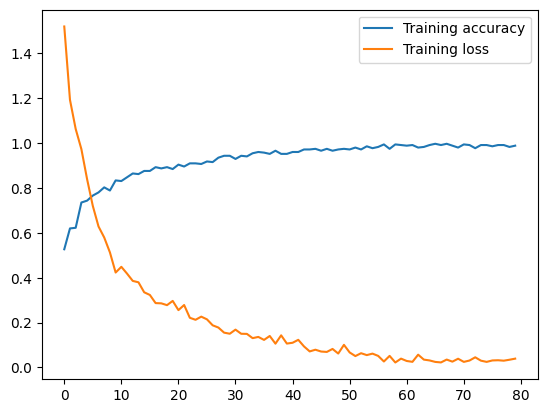

In [5]:
accuracy = train.history['accuracy']
loss = train.history['loss']
plt.plot(accuracy, label='Training accuracy')
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

In [6]:
# save model
model.save("Money.h5")

# Loade model
model_load=load_model('Money.h5')

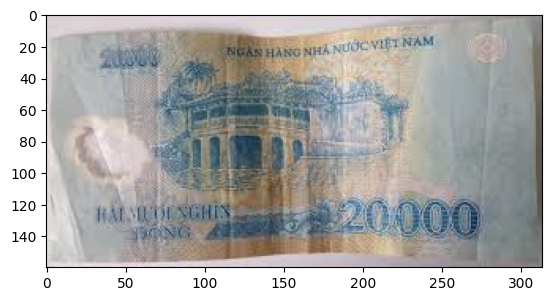

1/1 [==============================] - 0s 176ms/step
20k


In [7]:
import PIL.Image as Image
from keras.utils import load_img, img_to_array


url = '/kaggle/input/vn-money/Money/Test/Anh3.jpg'
# Load ảnh
img = Image.open(url)


# Hiển thị ảnh
plt.imshow(img)
plt.show()

img=load_img(url,target_size=(128,128))
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)

result=(model_load.predict(img).argmax())
print(class_img[result])